<h1> Data Mining on Airline Dataset

--------------

# Tables of Content:

**1) [Introduction](#Intro)** <br>
    - Information about the data set <br>
**2) [Libraries](#libraries)** <br>
    - Importing Libraries <br>
    - Reading Dataset <br>
**3) [Interesting Question1](#Question1)** <br>
    - Airports to be focused more on infrastructure development; mitigate the frequency and severity of delays <br>
**4) [Interesting Question2](#Question2)** <br>
    - Relationships between airline carriers and flight delays/cancellations; customers can make informed decisions <br>
**5) [Interesting Question3](#Question3)** <br>
    - Most common reasons for flight delays based on airports & airlines<br>
**6) [Interesting Question4](#Question4)** <br>
    - Relationships between times in a month or times in a day with delays/cancellations <br>
**7) [Preprocessing for classification model](#preprocessing)** <br>
    - Removing unnecessary columns <br>
    - Handling missing/null values <br>
    - Separating feature and target variables <br>
    - Correlation analysis <br>
    - Data transformation: One-hot encoding & Label encoding <br>
    - Identifying skewed data & applying log transformation <br>
    - Handling infinite & negative values<br>
    - Separating features and attributes<br>
    - Stratified shuffle split<br>
    - Standardization of data <br>
**8) [Classification Models](#classify)**<br>
    - Decision Tree <br> 
    - Random Forest Classifier<br>
    - Extra Trees Classifier<br>
    - Gradient Boosting Classifier<br>
    - XGBoost Classifier<br>
    - AdaBoost Classifier<br>
    - K-Nearest Neighbors<br>
    - Naive Bayes Classifier (Bernoulli, Gaussian, Multinomial)<br>
    - Logistic Regression <br>
**9) [Preprocessing for Delay Prediction Models](#preprocessingpredict)** <br>
    - Removing records with cancellations <br>
    - Selecting attributes required <br>
    - Using Label Encoder for attributes with catrgorical data <br>
    - Removing minutes data from time based attributes <br>
    - Converting dataframe into arrays <br>
    - Splitting the dataset into train and test sets <br>
    - Normalizing using Standard Scaler <br>
**10) [Delay Prediction Models](#predict)** <br>
    - Multiple Linear Regression <br>
    - Neural Network <br>

<a id="Intro"></a> <br>
# **1) Introduction:** 
<h2>Information about the data set</h2>
We have used dataset called “Airline Reporting Carrier On-Time Performance Dataset” that contains information about US domestic flights that have occurred since 1987. This data was compiled from the Bureau of Transportation Statistics.
The link to the data set is:
https://developer.ibm.com/exchanges/data/all/airline/


<a id="libraries"></a> <br>
# **2) Libraries:**

In [ ]:
# OS
import os

# Dataframe & array 
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Stats 
from scipy import stats 
import math

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import save_model, load_model

# Metrics & preprocessing 
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Warning 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Google colab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticating user & reading data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'12dIPIjjfG12MLYoxQ5xPHod_FBEzMTiZ'})

fileDownloaded.GetContentFile('final_airline_data.csv')

In [ ]:
# Compiling the dataset
os.chdir('/content')
root = os.getcwd()

filepath = '/drive/MyDrive/DM-Airline_on_Time/raw_data/'
columns = ['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FLIGHT_DATE', 'REPORTING_AIRLINE', 'ID_REPORTING_AIRLINE', 'CARRIER_REPORTING_AIRLINE', 'TAIL_NUMBER', 'FLIGHT_NUMBER_REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NAME', 'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE', 'DEST_STATE_FIPS', 'DEST_STATE_NAME', 'DEST_WAC', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_MINUTES', 'DEP_DEL_15', 'DEPARTURE_DELAY_GROUPS', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_MINUTES', 'ARR_DEL_15', 'ARRIVAL_DELAY_GROUPS', 'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME', 'TOTAL_ADD_G_TIME', 'LONGEST_ADD_G_TIME', 'DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST', 'DIV_ACTUAL_ELAPSED_TIME', 'DIV_ARR_DELAY', 'DIV_DISTANCE']

data = pd.DataFrame()
for fname in ['jan_22.csv', 'feb_22.csv', 'mar_22.csv', 'apr_22.csv']:
  print("Reading", fname)
  f = pd.read_csv(root+"/"+filepath+fname, usecols=np.arange(0,69))
  f.columns = columns
  data = pd.concat([data, f], ignore_index=True)
del(f)

data.to_csv('final_airline_data.csv', encoding='utf-8')

In [ ]:
# Checking out the dataset
df = pd.read_csv('final_airline_data.csv', index_col=0)

In [ ]:
df.head(3)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FLIGHT_DATE,REPORTING_AIRLINE,ID_REPORTING_AIRLINE,CARRIER_REPORTING_AIRLINE,TAIL_NUMBER,...,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_G_TIME,LONGEST_ADD_G_TIME,DIV_AIRPORT_LANDINGS,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE
0,2022,1,1,14,5,2022-01-14,YX,20452,YX,N119HQ,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,2022,1,1,15,6,2022-01-15,YX,20452,YX,N122HQ,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2022,1,1,16,7,2022-01-16,YX,20452,YX,N412YX,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FLIGHT_DATE', 'REPORTING_AIRLINE', 'ID_REPORTING_AIRLINE',
       'CARRIER_REPORTING_AIRLINE', 'TAIL_NUMBER',
       'FLIGHT_NUMBER_REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NAME', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE', 'DEST_STATE_FIPS', 'DEST_STATE_NAME', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_MINUTES',
       'DEP_DEL_15', 'DEPARTURE_DELAY_GROUPS', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_MINUTES', 'ARR_DEL_15', 'ARRIVAL_DELAY_GROUPS',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIM

In [ ]:
# Getting the name of airlines based on their codes assigned by the Department of Transportation: https://www.bts.gov/topics/airlines-and-airports/airline-codes
codes_filepath = '/drive/MyDrive/DM-Airline_on_Time/DOT_ID_AIRLINES.csv'
dot_id_airlines = pd.read_csv(root+codes_filepath, encoding='windows-1252', index_col = False)
dot_id_airlines = dict(zip(dot_id_airlines['Code'], dot_id_airlines['Airline']))

<a id="Question 1"></a> <br>
# **3) Question 1:**
- The information we wanted to seek from this interesting question was to understand which airports are affected by delays and how frequent the incidents happened at a particular airport and for a reporting airline.
- This information will be helpful in future for infrastructure development considering delays which are related to airport.


### Delay Based on Origin Airports

In [ ]:
delay_org_df = df[['ORIGIN', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

In [ ]:
count_delay_org_df = delay_org_df.groupby(['ORIGIN']).size().reset_index()
count_delay_org_df.rename(columns = {0:'Delay_Incidents'}, inplace = True)
count_delay_org_df.sort_values(by='Delay_Incidents', ascending=False, inplace = True)
count_delay_org_df = count_delay_org_df[0:15]

fig = px.bar(count_delay_org_df, x='ORIGIN', y='Delay_Incidents', title='Delay Incidents By Origin')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=14)
fig.show()

### Delay Based on Origin States

In [ ]:
delay_org_st_df = df[['ORIGIN_STATE', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']]

In [ ]:
count_delay_org_st_df = delay_org_st_df.groupby(['ORIGIN_STATE']).size().reset_index()
count_delay_org_st_df.rename(columns = {0:'Delay_Incidents'}, inplace = True)
count_delay_org_st_df.sort_values(by='Delay_Incidents', ascending=False, inplace = True)
count_delay_org_st_df = count_delay_org_st_df[0:15]

fig = px.bar(count_delay_org_st_df, x='ORIGIN_STATE', y='Delay_Incidents', title='Delay Incidents By Origin State')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=14)
fig.show()

<a id="Question 2"></a> <br>
# **4) Question 2:**
- For this problem, we wanted to find those airlines which have a lot of delays and cancellations in their flights and which need to improve their services. <br>
- This would help airlines to understand how they are performing in comparison to their competitiors in the market and how that could affect their business. <br>
- This would also help the customers to make a better and reliable selection while booking a flight


In [ ]:
delay_data = data[['REPORTING_AIRLINE', 'DEP_DELAY', 'DEP_DELAY_MINUTES', 'ARR_DELAY', 'ARR_DELAY_MINUTES', 'CANCELLED']]
delay_counts = pd.DataFrame()

In [ ]:
for airline in list(set(list(data['REPORTING_AIRLINE']))):
  print(airline, dot_id_airlines[airline])
  
  # Slicing the data for the particular airline
  airline_specific_data = delay_data[delay_data['REPORTING_AIRLINE'] == airline]
  
  # Getting delay data for Departures
  recorded_airline_specific_data_departure = airline_specific_data[airline_specific_data['DEP_DELAY_MINUTES'].notna()]
  total_fl_dep = len(recorded_airline_specific_data_departure)
  dep_delay_l_10 = len(recorded_airline_specific_data_departure[recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] <= 10])
  dep_delay_b_10_and_30 = len(recorded_airline_specific_data_departure[(recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] > 10) & (recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] <= 30)])
  dep_delay_m_30 = len(recorded_airline_specific_data_departure[recorded_airline_specific_data_departure['DEP_DELAY_MINUTES'] > 30])

  # Getting delay data for Arrivals
  recorded_airline_specific_data_arrival = airline_specific_data[airline_specific_data['ARR_DELAY_MINUTES'].notna()]
  total_fl_arr = len(recorded_airline_specific_data_arrival)
  arr_delay_l_10 = len(recorded_airline_specific_data_arrival[recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] <= 10])
  arr_delay_b_10_and_30 = len(recorded_airline_specific_data_arrival[(recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] > 10) & (recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] <= 30)])
  arr_delay_m_30 = len(recorded_airline_specific_data_arrival[recorded_airline_specific_data_arrival['ARR_DELAY_MINUTES'] > 30])

  # Getting flight cancellation data
  cancel_count = sum(airline_specific_data['CANCELLED']*1)

  # Putting everything together
  airline_delay_data = {}
  airline_delay_data['Airline_Code'] = airline
  airline_delay_data['Airline_Name'] = dot_id_airlines[airline]
  
  airline_delay_data['Total_Recorded_Departure_Flights'] = total_fl_dep
  airline_delay_data['Dep_Delays_L_10'] = round((dep_delay_l_10/total_fl_dep) * 100, 3)
  airline_delay_data['Dep_Delays_B_10_and_30'] = round((dep_delay_b_10_and_30/total_fl_dep) * 100, 3)
  airline_delay_data['Dep_Delays_M_30'] = round((dep_delay_m_30/total_fl_dep) * 100, 3)
  
  airline_delay_data['Total_Recorded_Arrival_Flights'] = total_fl_arr
  airline_delay_data['Arr_Delays_L_10'] = round((arr_delay_l_10/total_fl_arr) * 100, 3)
  airline_delay_data['Arr_Delays_B_10_and_30'] = round((arr_delay_b_10_and_30/total_fl_arr) * 100, 3)
  airline_delay_data['Arr_Delays_M_30'] = round((arr_delay_m_30/total_fl_arr) * 100, 3)

  airline_delay_data['Cancelled'] = round((cancel_count/len(airline_specific_data)) * 100, 3)
  
  delay_counts = delay_counts.append(airline_delay_data, ignore_index = True)

WN Southwest Airlines Co.
MQ Envoy Air
NK Spirit Air Lines
9E Endeavor Air Inc.
DL Delta Air Lines Inc.
G4 Allegiant Air
YV Mesa Airlines Inc.
AA American Airlines Inc.
HA Hawaiian Airlines Inc.
QX Horizon Air
AS Alaska Airlines Inc.
OH PSA Airlines Inc.
UA United Air Lines Inc.
YX Republic Airways
B6 JetBlue Airways
F9 Frontier Airlines Inc.
OO SkyWest Airlines Inc.


In [ ]:
delay_counts

,Airline_Code,Airline_Name,Total_Recorded_Departure_Flights,Dep_Delays_L_10,Dep_Delays_B_10_and_30,Dep_Delays_M_30,Total_Recorded_Arrival_Flights,Arr_Delays_L_10,Arr_Delays_B_10_and_30,Arr_Delays_M_30,Cancelled
0,WN,Southwest Airlines Co.,380909.0,67.434,16.974,15.592,380165.0,72.973,13.341,13.686,3.599
1,MQ,Envoy Air,83928.0,82.498,8.487,9.015,83653.0,80.835,9.605,9.560,3.959
2,NK,Spirit Air Lines,68745.0,70.471,11.691,17.838,68551.0,67.675,13.387,18.938,4.836
3,9E,Endeavor Air Inc.,79499.0,84.855,5.840,9.305,79311.0,81.943,7.844,10.213,3.247
4,DL,Delta Air Lines Inc.,269153.0,80.553,9.434,10.013,268580.0,81.095,9.122,9.782,1.578
5,G4,Allegiant Air,37556.0,65.215,14.791,19.994,37458.0,60.470,16.691,22.839,5.442
6,YV,Mesa Airlines Inc.,39149.0,79.305,8.049,12.647,39028.0,79.202,8.366,12.432,5.643
7,AA,American Airlines Inc.,262474.0,79.417,9.247,11.336,261704.0,78.253,10.332,11.415,3.821
8,HA,Hawaiian Airlines Inc.,22547.0,80.334,12.995,6.671,22524.0,78.561,14.571,6.868,1.460
9,QX,Horizon Air,29974.0,81.431,8.874,9.695,29855.0,79.022,11.077,9.901,2.689


Text(0, 0.5, 'Percent Delay')

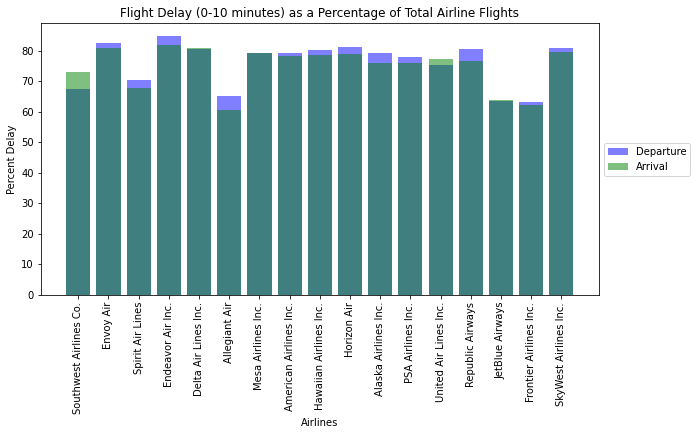

In [ ]:
# Data Visualization
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_L_10'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_L_10'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (0-10 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

Text(0, 0.5, 'Percent Delay')

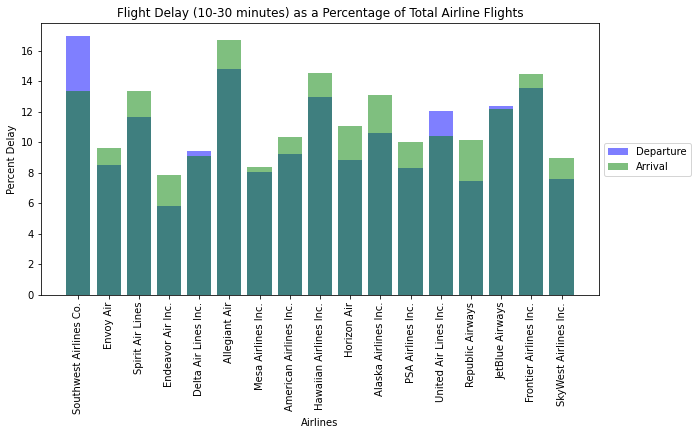

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_B_10_and_30'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_B_10_and_30'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (10-30 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

Text(0, 0.5, 'Percent Delay')

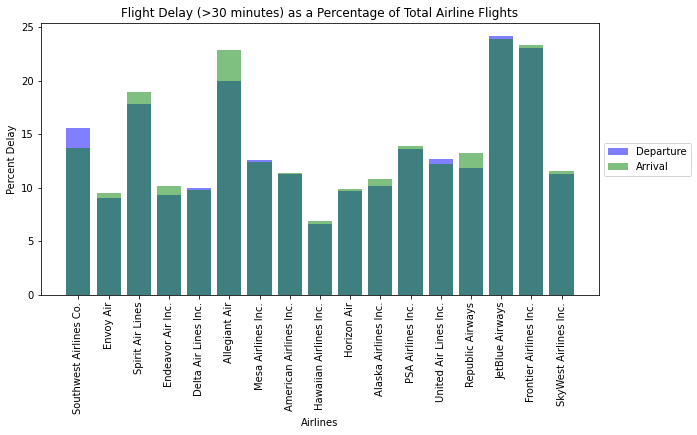

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Dep_Delays_M_30'], color = 'b', alpha = 0.5)
plt.bar(delay_counts['Airline_Name'], delay_counts['Arr_Delays_M_30'], color = 'g', alpha = 0.5)
plt.legend(['Departure', 'Arrival'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)
plt.title('Flight Delay (>30 minutes) as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Delay')

Text(0, 0.5, 'Percent Cancelled')

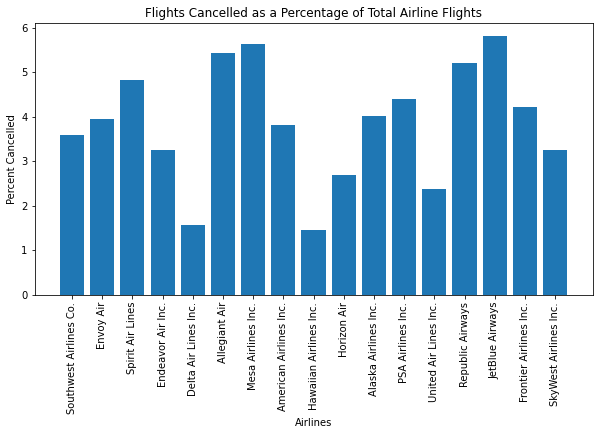

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar(delay_counts['Airline_Name'], delay_counts['Cancelled'])
plt.xticks(rotation = 90)
plt.title('Flights Cancelled as a Percentage of Total Airline Flights')
plt.xlabel('Airlines')
plt.ylabel('Percent Cancelled')

<a id="Question 3"></a> <br>
# **5) Question 3:**
- The answer we were seeking from this question was what were the most common reasons for delays based on airport information. 
- This information would be helpful for us to understand which airports are affected the most by a particular type of delay and to provide relevant information to airport authorities to work on improving their services. 
- The analysis was further extended considering origin state of flights as well as which airlines have the most frequent cases of delays.


### Common Reasons for Delays

In [ ]:
carrier_delay_df = df[df['CARRIER_DELAY']>0]
weather_delay_df = df[df['WEATHER_DELAY']>0]
nas_delay_df = df[df['NAS_DELAY']>0]
security_delay_df = df[df['SECURITY_DELAY']>0]
late_delay_df = df[df['LATE_AIRCRAFT_DELAY']>0]

carrier_delay_counts = carrier_delay_df.shape[0]
weather_delay_counts = weather_delay_df.shape[0]
nas_delay_counts = nas_delay_df.shape[0]
security_delay_counts = security_delay_df.shape[0]
late_delay_counts = late_delay_df.shape[0]

In [ ]:
data = [['Carrier_Delay', carrier_delay_counts], ['Weather_Delay', weather_delay_counts], ['NAS_Delay', nas_delay_counts], 
        ['Security_Delay', security_delay_counts], ['Aircraft_Late_Delay', late_delay_counts]]
count_delay_df = pd.DataFrame(data, columns=['Delay_Type', 'Delay_Count']).sort_values(by='Delay_Count', ascending=False)

In [ ]:
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
           subplot_titles=['Pie-chart', 'Bar Graph'],
)

fig.add_trace(go.Pie(labels=count_delay_df['Delay_Type'],values=count_delay_df['Delay_Count'], name='Pie-chart'),1,1)
fig.add_trace(go.Bar(x=count_delay_df['Delay_Type'], y=count_delay_df['Delay_Count'], name='Bar Graph'), 1,2)

fig.update_layout(title_text='Common Reasons for Delay')
fig.show()

### Common Reasons for Delays Based on Airports

In [ ]:
sum_delay_org_df = delay_org_df.groupby(['ORIGIN']).sum().reset_index()

top10_carrier_delay_org = sum_delay_org_df[['ORIGIN', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)[:10]
top10_weather_delay_org = sum_delay_org_df[['ORIGIN', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)[:10]
top10_nas_delay_org = sum_delay_org_df[['ORIGIN', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)[:10]
top10_security_delay_org = sum_delay_org_df[['ORIGIN', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)[:10]
top10_late_delay_org = sum_delay_org_df[['ORIGIN', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)[:10]

In [ ]:
fig = px.bar(top10_carrier_delay_org, x='ORIGIN', y='CARRIER_DELAY', title='Top 10 Carrier Delay By Origin Airports')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.5)
fig.show()

fig = px.bar(top10_weather_delay_org, x='ORIGIN', y='WEATHER_DELAY', title='Top 10 Weather Delay By Origin Airports')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.5)
fig.show()

fig = px.bar(top10_nas_delay_org, x='ORIGIN', y='NAS_DELAY', title='Top 10 NAS Delay By Origin Airports')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.5)
fig.show()

fig = px.bar(top10_security_delay_org, x='ORIGIN', y='SECURITY_DELAY', title='Top 10 Security Delay By Origin Airports')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.5)
fig.show()

fig = px.bar(top10_late_delay_org, x='ORIGIN', y='LATE_AIRCRAFT_DELAY', title='Top 10 Late Aircraft Delay By Origin Airports')
fig.update_layout(xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.5)
fig.show()

### Common Reasons for Delays Based on Origin States

In [ ]:
sum_delay_org_st_df = delay_org_st_df.groupby(['ORIGIN_STATE']).sum().reset_index()

top10_carrier_delay_org_st= sum_delay_org_st_df[['ORIGIN_STATE', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)[:10]
top10_weather_delay_org_st= sum_delay_org_st_df[['ORIGIN_STATE', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)[:10]
top10_nas_delay_org_st= sum_delay_org_st_df[['ORIGIN_STATE', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)[:10]
top10_security_delay_org_st= sum_delay_org_st_df[['ORIGIN_STATE', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)[:10]
top10_late_delay_org_st= sum_delay_org_st_df[['ORIGIN_STATE', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)[:10]

In [ ]:
fig = px.bar(top10_carrier_delay_org_st, x='ORIGIN_STATE', y='CARRIER_DELAY', title='Top 10 Carrier Delay By Origin States')
fig.show()
fig = px.bar(top10_weather_delay_org_st, x='ORIGIN_STATE', y='WEATHER_DELAY', title='Top 10 Weather Delay By Origin States')
fig.show()
fig = px.bar(top10_nas_delay_org_st, x='ORIGIN_STATE', y='NAS_DELAY', title='Top 10 NAS Delay By Origin States')
fig.show()
fig = px.bar(top10_security_delay_org_st, x='ORIGIN_STATE', y='SECURITY_DELAY', title='Top 10 Security Delay By Origin States')
fig.show()
fig = px.bar(top10_late_delay_org_st, x='ORIGIN_STATE', y='LATE_AIRCRAFT_DELAY', title='Top 10 Late Aircraft Delay By Origin States')
fig.show()

### Common Reasons for Delays Based on Reporting Airline

In [ ]:
sum_delay_ra_df = delay_ra_df.groupby(['REPORTING_AIRLINE']).sum().reset_index()

top10_carrier_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)[:10]
top10_weather_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)[:10]
top10_nas_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)[:10]
top10_security_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)[:10]
top10_late_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)[:10]

In [ ]:
fig = px.bar(top10_carrier_delay_ra, x='REPORTING_AIRLINE', y='CARRIER_DELAY', title='Top 10 Carrier Delay By Reporting Airlines')
fig.show()
fig = px.bar(top10_weather_delay_ra, x='REPORTING_AIRLINE', y='WEATHER_DELAY', title='Top 10 Weather Delay By Reporting Airlines')
fig.show()
fig = px.bar(top10_nas_delay_ra, x='REPORTING_AIRLINE', y='NAS_DELAY', title='Top 10 NAS Delay By Reporting Airlines')
fig.show()
fig = px.bar(top10_security_delay_ra, x='REPORTING_AIRLINE', y='SECURITY_DELAY', title='Top 10 Security Delay By Reporting Airlines')
fig.show()
fig = px.bar(top10_late_delay_ra, x='REPORTING_AIRLINE', y='LATE_AIRCRAFT_DELAY', title='Top 10 Late Aircraft Delay By Reporting Airlines')
fig.show()

In [ ]:
sum_delay_ra_df = delay_ra_df.groupby(['REPORTING_AIRLINE']).sum().reset_index()

carrier_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'CARRIER_DELAY']].sort_values(by='CARRIER_DELAY', ascending=False)
weather_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'WEATHER_DELAY']].sort_values(by='WEATHER_DELAY', ascending=False)
nas_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'NAS_DELAY']].sort_values(by='NAS_DELAY', ascending=False)
security_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'SECURITY_DELAY']].sort_values(by='SECURITY_DELAY', ascending=False)
late_delay_ra = sum_delay_ra_df[['REPORTING_AIRLINE', 'LATE_AIRCRAFT_DELAY']].sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=carrier_delay_ra['REPORTING_AIRLINE'], y=carrier_delay_ra['CARRIER_DELAY'], name='Carrier Delay'))
fig.add_trace(go.Bar(x=weather_delay_ra['REPORTING_AIRLINE'], y=weather_delay_ra['WEATHER_DELAY'], name='Weather Delay'))
fig.add_trace(go.Bar(x=nas_delay_ra['REPORTING_AIRLINE'], y=nas_delay_ra['NAS_DELAY'], name='NAS Delay'))
fig.add_trace(go.Bar(x=security_delay_ra['REPORTING_AIRLINE'], y=security_delay_ra['SECURITY_DELAY'], name='Security Delay'))
fig.add_trace(go.Bar(x=late_delay_ra['REPORTING_AIRLINE'], y=late_delay_ra['LATE_AIRCRAFT_DELAY'], name='Aircraft Late Delay'))

fig.update_xaxes(tickangle=270)
fig.update_layout( xaxis_tickfont_size=16, yaxis_tickfont_size=16)
fig.update_traces(width=0.3)
fig.show()

<a id="Question 4"></a> <br>
# **6) Question 4:**
- For this problem, we wanted to find information that would be useful to the consumer when booking a flight.


In [ ]:
#This is the will focus on day of the week
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import truediv

In [ ]:
! gdown --id 12dIPIjjfG12MLYoxQ5xPHod_FBEzMTiZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12dIPIjjfG12MLYoxQ5xPHod_FBEzMTiZ
To: /content/final_airline_data.csv
100% 705M/705M [00:04<00:00, 145MB/s]


In [ ]:
df = pd.read_csv('final_airline_data.csv')

In [ ]:
#imported dataset
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
#This focuses exclusively on cancellations
df1 = df.loc[df['CANCELLED'] == 1.0]


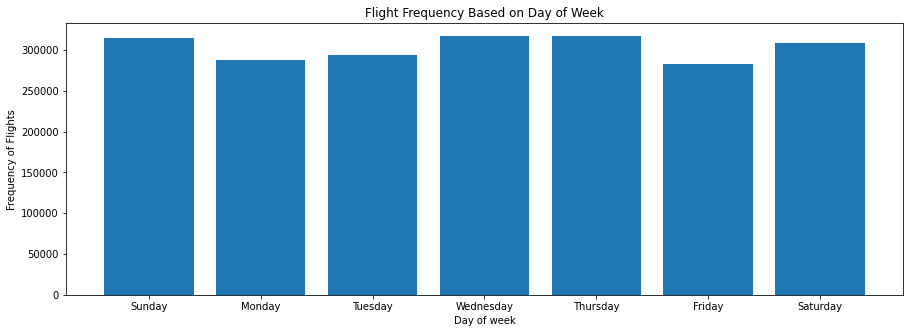

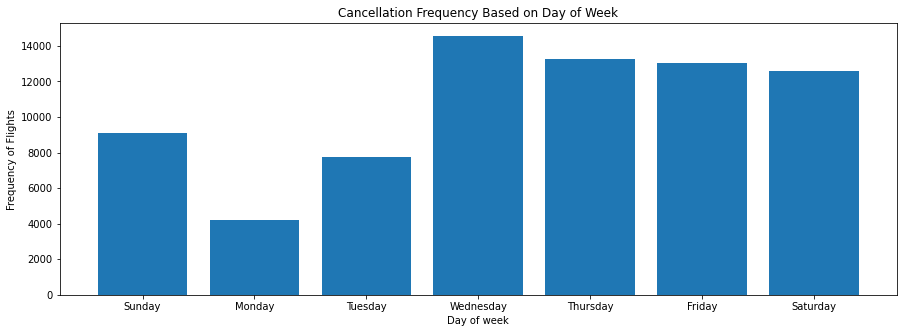

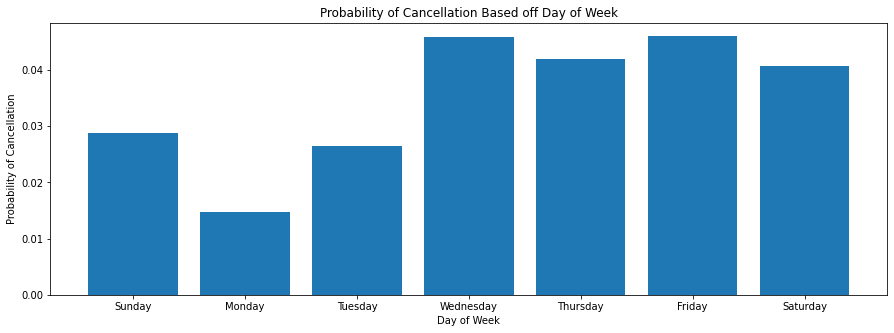

In [ ]:
Sunday = df.loc[df['DAY_OF_WEEK'] == 1].shape[0]
Monday = df.loc[df['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = df.loc[df['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = df.loc[df['DAY_OF_WEEK'] == 4].shape[0]
Thursday = df.loc[df['DAY_OF_WEEK'] == 5].shape[0]
Friday = df.loc[df['DAY_OF_WEEK'] == 6].shape[0]
Saturday = df.loc[df['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
flight_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(flight_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Flight Frequency Based on Day of Week')
plt.bar(range(len(flight_data)), flight_data)
plt.show()

Sunday1 = df1.loc[df1['DAY_OF_WEEK'] == 1].shape[0]
Monday1 = df1.loc[df1['DAY_OF_WEEK'] == 2].shape[0]
Tuesday1 = df1.loc[df1['DAY_OF_WEEK'] == 3].shape[0]
Wednesday1 = df1.loc[df1['DAY_OF_WEEK'] == 4].shape[0]
Thursday1 = df1.loc[df1['DAY_OF_WEEK'] == 5].shape[0]
Friday1 = df1.loc[df1['DAY_OF_WEEK'] == 6].shape[0]
Saturday1 = df1.loc[df1['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cancel_data = [Sunday1, Monday1, Tuesday1, Wednesday1, Thursday1, Friday1, Saturday1]
plt.figure(figsize=(15,5))
plt.xticks(range(len(cancel_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Cancellation Frequency Based on Day of Week')
plt.bar(range(len(cancel_data)), cancel_data)
plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# divide
chance_data = list(map(truediv, cancel_data, flight_data))


labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Cancellation')
plt.title('Probability of Cancellation Based off Day of Week')
plt.bar(range(len(chance_data)), chance_data)
plt.show()

In [ ]:
delay_df = df.loc[df['CANCELLED'] == 0.0]
delay_df.head()

df_short_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(0.1,10.0)]
df_medium_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(10.1,30.0)]
df_long_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(30.1,60.0)]

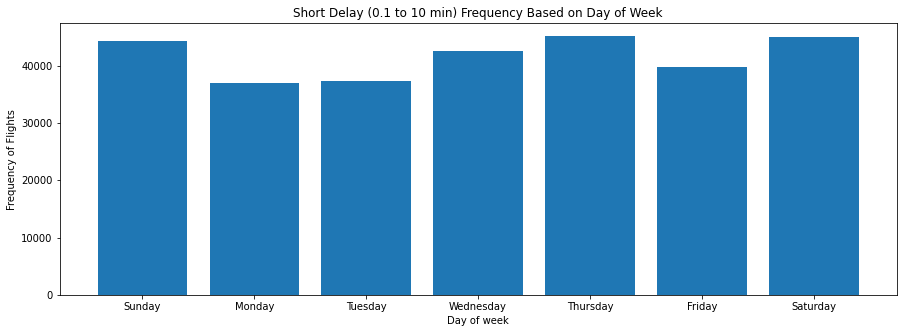

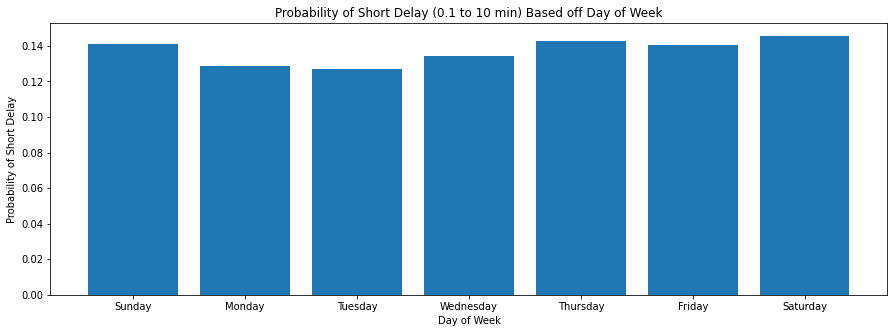

In [ ]:

Sunday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 1].shape[0]
Monday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 4].shape[0]
Thursday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 5].shape[0]
Friday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 6].shape[0]
Saturday = df_short_delay.loc[df_short_delay['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
short_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Short Delay (0.1 to 10 min) Frequency Based on Day of Week')
plt.bar(range(len(short_delay_data)), short_delay_data)
plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Use zip
chance_data = list(map(truediv, short_delay_data, flight_data))



labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Short Delay')
plt.title('Probability of Short Delay (0.1 to 10 min) Based off Day of Week')
plt.bar(range(len(chance_data)), chance_data)
plt.show()

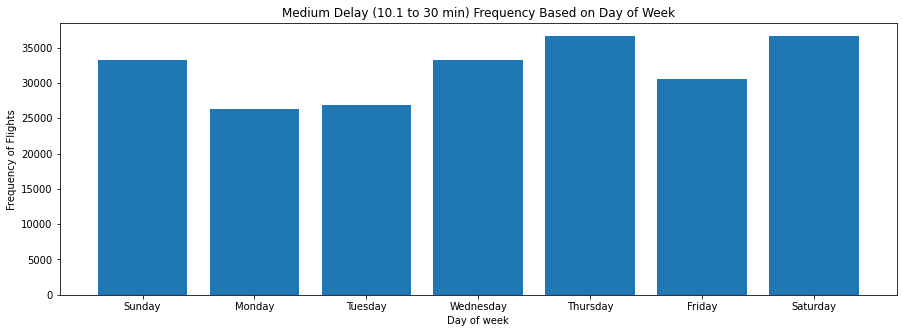

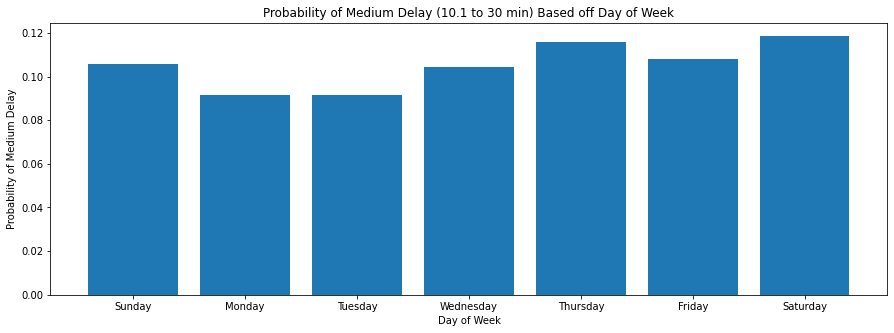

In [ ]:
Sunday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 1].shape[0]
Monday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 4].shape[0]
Thursday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 5].shape[0]
Friday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 6].shape[0]
Saturday = df_medium_delay.loc[df_medium_delay['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
medium_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Medium Delay (10.1 to 30 min) Frequency Based on Day of Week')
plt.bar(range(len(medium_delay_data)), medium_delay_data)
plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Use zip
chance_data = list(map(truediv, medium_delay_data, flight_data))


labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Medium Delay')
plt.title('Probability of Medium Delay (10.1 to 30 min) Based off Day of Week')
plt.bar(range(len(chance_data)), chance_data)
plt.show()

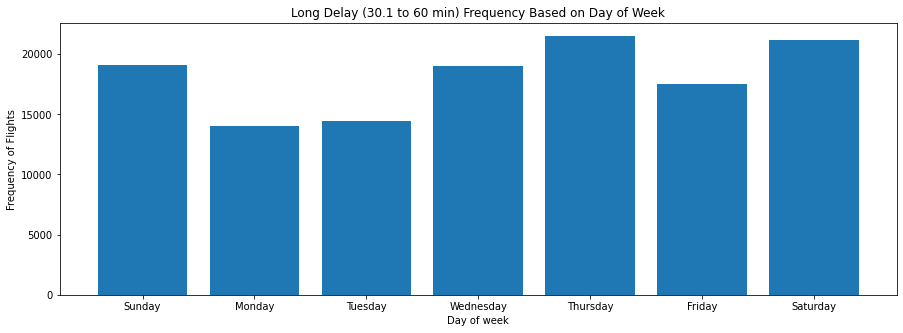

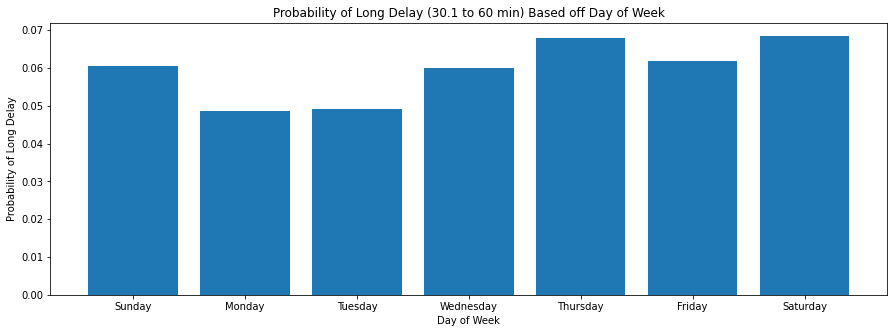

In [ ]:
Sunday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 1].shape[0]
Monday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 2].shape[0]
Tuesday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 3].shape[0]
Wednesday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 4].shape[0]
Thursday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 5].shape[0]
Friday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 6].shape[0]
Saturday = df_long_delay.loc[df_long_delay['DAY_OF_WEEK'] == 7].shape[0]

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
long_delay_data = [Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Day of week')
plt.ylabel('Frequency of Flights')
plt.title('Long Delay (30.1 to 60 min) Frequency Based on Day of Week')
plt.bar(range(len(long_delay_data)), long_delay_data)
plt.show()

labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Use zip
chance_data = list(map(truediv, long_delay_data, flight_data))



labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,5))
plt.xticks(range(len(long_delay_data)), labels)
plt.xlabel('Day of Week')
plt.ylabel('Probability of Long Delay')
plt.title('Probability of Long Delay (30.1 to 60 min) Based off Day of Week')
plt.bar(range(len(chance_data)), chance_data)
plt.show()

In [ ]:
cancel_df = df.loc[df['CANCELLED'] == 1.0]


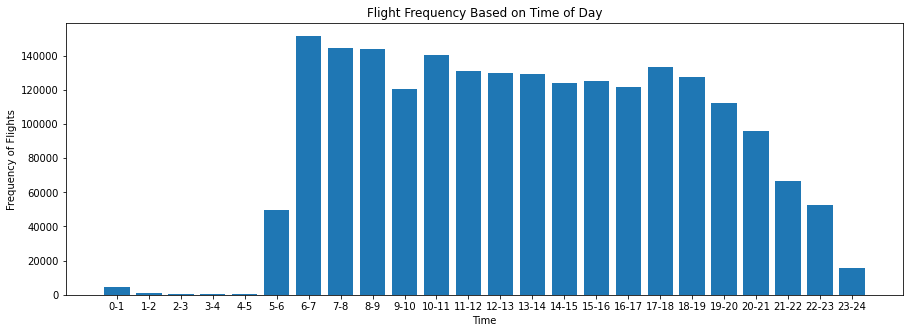

In [ ]:
hour0 = df.loc[df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = df.loc[df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = df.loc[df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = df.loc[df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = df.loc[df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = df.loc[df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = df.loc[df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = df.loc[df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = df.loc[df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = df.loc[df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = df.loc[df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = df.loc[df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = df.loc[df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = df.loc[df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = df.loc[df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = df.loc[df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = df.loc[df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = df.loc[df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = df.loc[df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = df.loc[df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = df.loc[df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = df.loc[df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = df.loc[df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = df.loc[df['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
flight_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
plt.figure(figsize=(15,5))
plt.xticks(range(len(flight_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Flights')
plt.title('Flight Frequency Based on Time of Day')
plt.bar(range(len(flight_data)), flight_data)
plt.show()

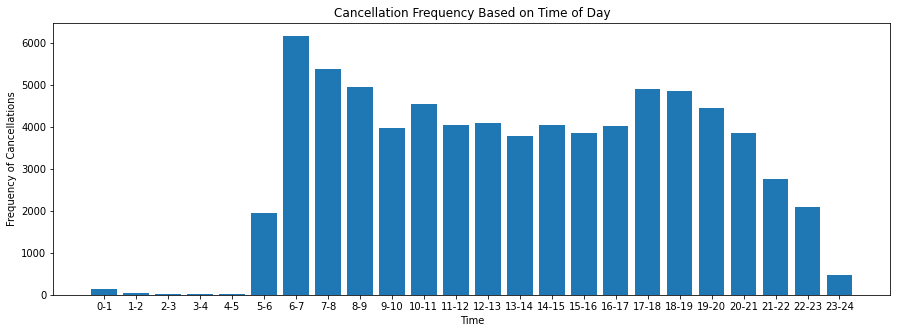

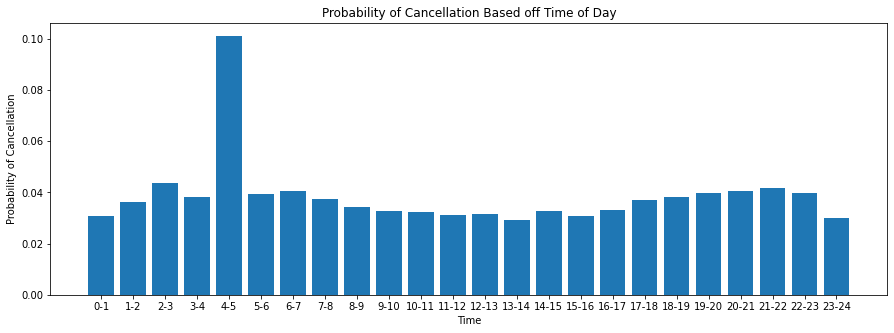

In [ ]:
hour0 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = cancel_df.loc[cancel_df['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
cancel_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
plt.figure(figsize=(15,5))
plt.xticks(range(len(cancel_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Cancellations')
plt.title('Cancellation Frequency Based on Time of Day')
plt.bar(range(len(cancel_data)), cancel_data)
plt.show()

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
# Use zip
chance_data = list(map(truediv, cancel_data, flight_data))


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Cancellation')
plt.title('Probability of Cancellation Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)
plt.show()

In [ ]:
delay_df = df.loc[df['CANCELLED'] == 0.0]

df_short_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(0.1,10.0)]
df_medium_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(10.1,30.0)]
df_long_delay = delay_df.loc[delay_df['DEP_DELAY_MINUTES'].between(30.1,60.0)]

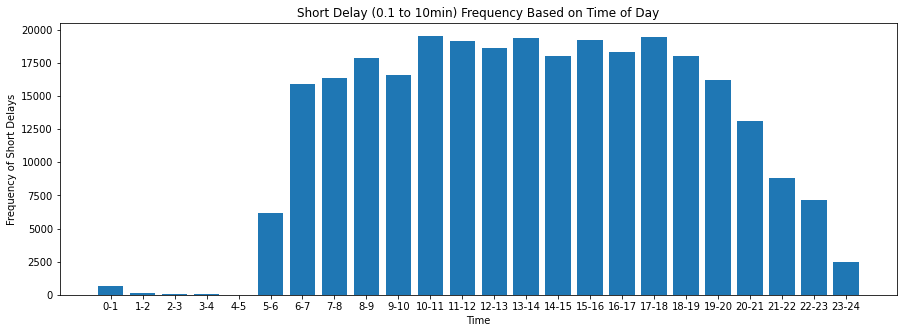

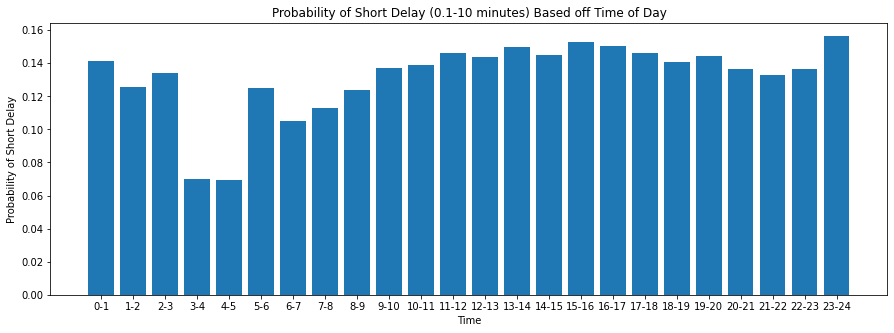

In [ ]:
hour0 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = df_short_delay.loc[df_short_delay['CRS_DEP_TIME'].between(2300,2399)].shape[0]

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
short_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
plt.figure(figsize=(15,5))
plt.xticks(range(len(short_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Short Delays')
plt.title('Short Delay (0.1 to 10min) Frequency Based on Time of Day')
plt.bar(range(len(short_delay_data)), short_delay_data)
plt.show()

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
chance_data = list(map(truediv, short_delay_data, flight_data))

labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Short Delay')
plt.title('Probability of Short Delay (0.1-10 minutes) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)
plt.show()


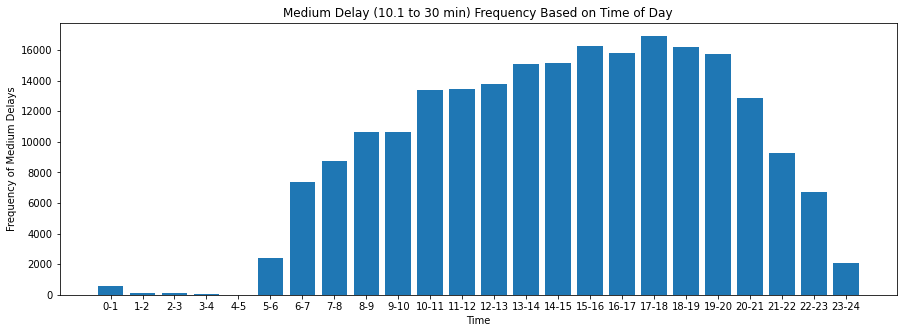

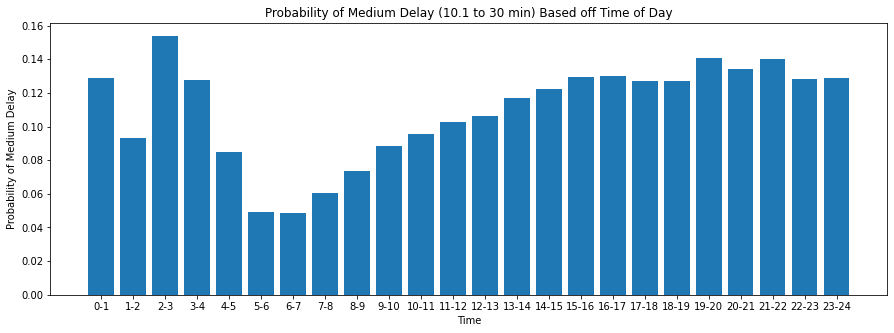

In [ ]:
hour0 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = df_medium_delay.loc[df_medium_delay['CRS_DEP_TIME'].between(2300,2399)].shape[0]


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
medium_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
plt.figure(figsize=(15,5))
plt.xticks(range(len(medium_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Medium Delays')
plt.title('Medium Delay (10.1 to 30 min) Frequency Based on Time of Day')
plt.bar(range(len(medium_delay_data)), medium_delay_data)
plt.show()



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

chance_data = list(map(truediv, medium_delay_data, flight_data))



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Medium Delay')
plt.title('Probability of Medium Delay (10.1 to 30 min) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)
plt.show()



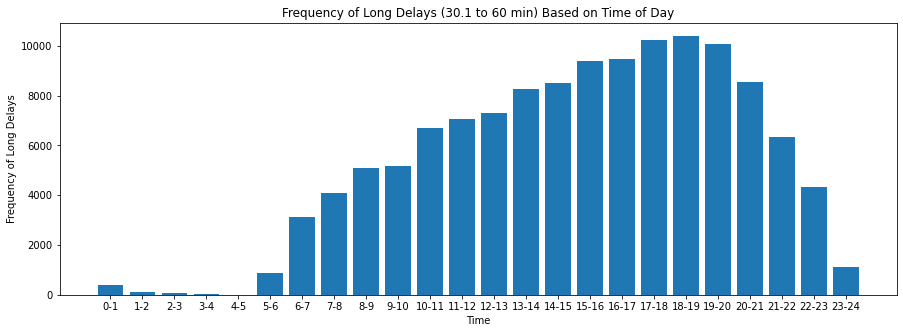

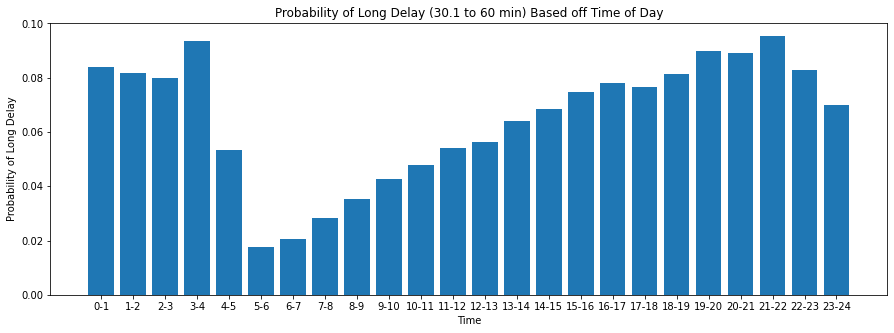

In [ ]:
hour0 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(0,99)].shape[0]
hour1 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(100,199)].shape[0]
hour2 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(200,299)].shape[0]
hour3 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(300,399)].shape[0]
hour4 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(400,499)].shape[0]
hour5 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(500,599)].shape[0]
hour6 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(600,699)].shape[0]
hour7 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(700,799)].shape[0]
hour8 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(800,899)].shape[0]
hour9 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(900,999)].shape[0]
hour10 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1000,1099)].shape[0]
hour11 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1100,1199)].shape[0]
hour12 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1200,1299)].shape[0]
hour13 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1300,1399)].shape[0]
hour14 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1400,1499)].shape[0]
hour15 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1500,1599)].shape[0]
hour16 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1600,1699)].shape[0]
hour17 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1700,1799)].shape[0]
hour18 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1800,1899)].shape[0]
hour19 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(1900,1999)].shape[0]
hour20 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(2000,2099)].shape[0]
hour21 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(2100,2199)].shape[0]
hour22 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(2200,2299)].shape[0]
hour23 = df_long_delay.loc[df_long_delay['CRS_DEP_TIME'].between(2300,2399)].shape[0]



labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
long_delay_data = [hour0, hour1, hour2, hour3, hour4, hour5, hour6, hour7, hour8, hour9, hour10, hour11, hour12, hour13, hour14, hour15, hour16, hour17, hour18, hour19, hour20, hour21, hour22, hour23]
plt.figure(figsize=(15,5))
plt.xticks(range(len(long_delay_data)), labels)
plt.xlabel('Time')
plt.ylabel('Frequency of Long Delays')
plt.title('Frequency of Long Delays (30.1 to 60 min) Based on Time of Day')
plt.bar(range(len(long_delay_data)), long_delay_data)
plt.show()


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']

chance_data = list(map(truediv, long_delay_data, flight_data))


labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
plt.figure(figsize=(15,5))
plt.xticks(range(len(chance_data)), labels)
plt.xlabel('Time')
plt.ylabel('Probability of Long Delay')
plt.title('Probability of Long Delay (30.1 to 60 min) Based off Time of Day')
plt.bar(range(len(chance_data)), chance_data)
plt.show()



<a id="Preprocessing"></a> <br>
# **7) Preprocessing for Classification Model:**



In [ ]:
# Removing unncessary columns
df = df.drop(['CARRIER_REPORTING_AIRLINE','TAIL_NUMBER','FLIGHT_DATE','ORIGIN_STATE_NAME', 'ORIGIN_STATE', 'ORIGIN_CITY_NAME', 'DIV_AIRPORT_LANDINGS',
                          'DEST_STATE_NAME', 'DEST_STATE', 'DEST_CITY_NAME', 'DEP_TIME_BLK','ARR_TIME_BLK','TAXI_OUT','TAXI_IN','WHEELS_ON','ACTUAL_ELAPSED_TIME',
                         'YEAR','QUARTER','ID_REPORTING_AIRLINE','FLIGHT_NUMBER_REPORTING_AIRLINE','ORIGIN_AIRPORT_ID','ORIGIN_CITY_MARKET_ID',
                         'ORIGIN_AIRPORT_SEQ_ID','ORIGIN_STATE_FIPS','ORIGIN_WAC','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID',
                         'DEST_STATE_FIPS','DEST_WAC','CRS_DEP_TIME','DEPARTURE_DELAY_GROUPS','CRS_ARR_TIME','ARRIVAL_DELAY_GROUPS','CRS_ELAPSED_TIME'], axis=1)

In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTH,2122756.0,2.506665,1.118356,1.0,1.00,3.0,3.0,4.0
DAY_OF_MONTH,2122756.0,15.574678,8.692289,1.0,8.00,16.0,23.0,31.0
DAY_OF_WEEK,2122756.0,3.997897,2.002227,1.0,2.00,4.0,6.0,7.0
DEP_TIME,2049518.0,1332.655606,501.765166,1.0,918.00,1325.0,1741.0,2400.0
DEP_DELAY,2049475.0,11.890417,50.660397,-78.0,-5.00,-2.0,9.0,2966.0
DEP_DELAY_MINUTES,2049475.0,14.895570,49.640494,0.0,0.00,0.0,9.0,2966.0
DEP_DEL_15,2049475.0,0.206747,0.404973,0.0,0.00,0.0,0.0,1.0
WHEELS_OFF,2048592.0,1355.546915,502.836624,1.0,934.00,1338.0,1754.0,2400.0
ARR_TIME,2047605.0,1467.352028,536.743349,1.0,1054.00,1507.0,1915.0,2400.0
ARR_DELAY,2043645.0,5.924142,52.847191,-100.0,-15.00,-6.0,9.0,2934.0


In [ ]:
# Handling null/missing values
null_df = df.isnull().sum().to_frame()
#null_df[null_df[0] != 0]

In [ ]:
# Dropping rows where cancellation code is null since a missing value there means no cancellation
df.dropna(subset=['CANCELLATION_CODE'], inplace=True)

In [ ]:
# Resetting index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Removing attributes with huge number of values and were insignificant
col_drop = null_df[null_df[0] > 2100000 ].index

df_clean = df.drop(col_drop, axis=1)

In [ ]:
# Correlation analysis for removing highly correlated attributes
cor_matrix = df_clean.corr().abs()
#print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
#print(upper_tri)

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
#print(); print(to_drop)

df_clean2 = df_clean.drop(to_drop, axis=1)
#df_clean2.head()

In [ ]:
# Data transformation for correct encoding
cat_cols = df_clean2.columns[df_clean2.dtypes == 'O']
num_cols = df_clean2.columns[df_clean2.dtypes == 'int'].union(df_clean2.columns[df_clean2.dtypes == 'float'])

In [ ]:
# Identifying skewed data 
skew_vals = df_clean2[num_cols].skew()

skew_limit = 0.75

skew_cols = (skew_vals.
            sort_values(ascending=False)
            .to_frame()
            .rename(columns={0:'Skew'})
            .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
DEP_DELAY,3.965764
DISTANCE,1.429807
MONTH,0.791475


In [ ]:
# Applying log transformation for converting to gaussian distribution
for col in skew_cols.index.values:
    df_clean2[col] = df_clean2[col].apply(np.log1p)

In [ ]:
# One-hot encoding
org_df = pd.get_dummies(df_clean2['ORIGIN'], prefix='ORG')
rep_airline_df = pd.get_dummies(df_clean2['REPORTING_AIRLINE'], prefix='REP_AIRLINE')
#org_state_df = pd.get_dummies(df['ORIGIN_STATE'])
dest_df = pd.get_dummies(df_clean2['DEST'], prefix='DEST')
#cancel_code_df = pd.get_dummies(df['CANCELLATION_CODE'], prefix='CANCEL_CODE')

In [ ]:
# Label encoding
le = LabelEncoder()

df_clean2['CANCELLATION_CODE'] = le.fit_transform(df_clean2['CANCELLATION_CODE'])

In [ ]:
# Concatenating new attributes and removing old ones
df_clean2 = pd.concat([df_clean2, rep_airline_df, org_df, dest_df], axis=1)

df_clean2 = df_clean2.drop(['ORIGIN', 'REPORTING_AIRLINE', 'DEST'], axis=1)

In [ ]:
# Filling null values of delay attributes with 0
df_clean2.fillna(0, inplace=True)

#null_df = df_clean2.isnull().sum().to_frame()
#null_df[null_df[0] != 0]

In [ ]:
# Checking for infinite values
c = np.isinf(df_clean2).values.sum()
print("It contains " + str(c) + " infinite values")

It contains 42 infinite values


In [ ]:
# Removing rows with infinity values
df_clean2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean2.dropna(how="all", inplace=True)

In [ ]:
# Converting negative values of delays to 0
df_clean2.replace([df_clean2['DEP_DELAY'] < 0], 0, inplace=True)
(df_clean2 < 0).sum().sum()

0

In [ ]:
# Separating features and attributes
feature_cols = [x for x in df_clean2.columns if x!='CANCELLATION_CODE']
X = df_clean2[feature_cols]
y = df_clean2['CANCELLATION_CODE']

In [ ]:
# Stratified shuffle split
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, df_clean2.CANCELLATION_CODE))

# Create the dataframes
X_train = X.loc[train_idx, X.columns]
y_train = df_clean2.loc[train_idx, 'CANCELLATION_CODE']

X_test  = X.loc[test_idx, X.columns]
y_test  = df_clean2.loc[test_idx, 'CANCELLATION_CODE']

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52157, 747), (52157,), (22353, 747), (22353,))

In [ ]:
# Standardization of data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="classify"></a> <br>
# **8) Classification Models:** 
Classification models were built for multi-class problem of classifying cancellation code

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

dt.tree_.node_count, dt.tree_.max_depth

(15207, 70)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='macro')},
                      name=label)

# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.979830,0.833624
precision,0.981415,0.764656
recall,0.964180,0.734179
f1,0.972465,0.748603


### Random Forest Classifier

In [ ]:
rfcl = RandomForestClassifier()

rfcl.fit(X_train,y_train)

y_pred_rf = rfcl.predict(X_test)

In [ ]:
print("Prediction by Random Forest: ", rfcl.predict(X_train.iloc[15:20]))

print("\nActual Labels: \n",y_train.iloc[15:20])

Prediction by Random Forest:  [1 1 1 0 1]

Actual Labels: 
 2300     1
45004    1
16547    1
40609    0
36038    1
Name: CANCELLATION_CODE, dtype: int64


In [ ]:
print("\nRandom Forest: \n",confusion_matrix(y_pred_rf,y_test))


Random Forest: 
 [[ 6219  1004   205    84]
 [ 1450 11952   384    21]
 [  117   128   600     1]
 [   23     3     2   160]]


In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = rfcl.predict(X_train)
y_test_pred = rfcl.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.979830,0.846911
precision,0.979836,0.843944
recall,0.979830,0.846911
f1,0.979808,0.843765


### Extra Trees Classifier

In [ ]:
# bootstrap > Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

#et_oob_df

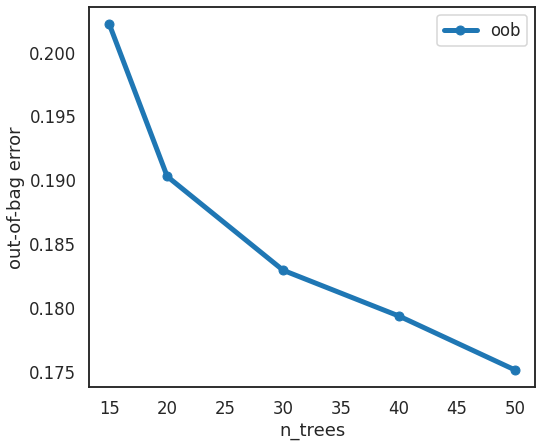

In [ ]:
# Out-of-bag error vs No. of trees for optimum selection
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(marker='o', figsize=(8, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
ET_opt = EF.set_params(n_estimators=50)

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = ET_opt.predict(X_train)
y_test_pred = ET_opt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.979734,0.834340
precision,0.979751,0.830827
recall,0.979734,0.834340
f1,0.979725,0.830264


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred_gb = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred_gb)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

# error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


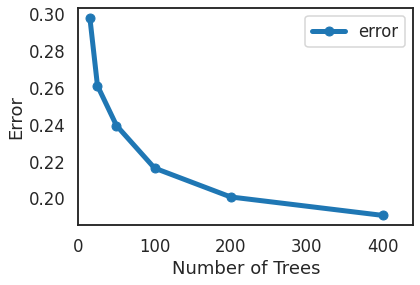

In [ ]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(6, 4), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = GBC.predict(X_train)
y_test_pred = GBC.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.826543,0.809287
precision,0.824803,0.806239
recall,0.826543,0.809287
f1,0.823809,0.805023


### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = XGBC.predict(X_train)
y_test_pred = XGBC.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.768046,0.763835
precision,0.764728,0.760373
recall,0.768046,0.763835
f1,0.761437,0.755918


### AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
#ABC = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

ABC_GCV = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

ABC_GCV = ABC_GCV.fit(X_train, y_train)

# The best model
print(ABC_GCV.best_estimator_)

ABC_GCV = AdaBoostClassifier(n_estimators=100, base_estimator= DecisionTreeClassifier(max_depth=1),learning_rate=0.01)
ABC_GCV = ABC_GCV.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.001, n_estimators=100)


In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = ABC_GCV.predict(X_train)
y_test_pred = ABC_GCV.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.585482,0.585470
precision,0.342790,0.342775
recall,0.585482,0.585470
f1,0.432410,0.432395


### K-Nearest Neighbors

In [ ]:
max_k = 5
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_pred, y_test, average='weighted')
    f1_scores.append((k, round(f1_score(y_test, y_pred, average='weighted'), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

#f1_results.head()

<Figure size 1800x1200 with 0 Axes>

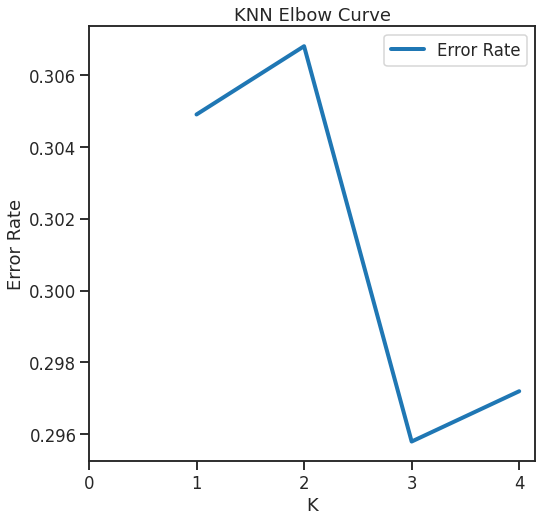

In [ ]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(0, max_k))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [ ]:
# Estimate KNN model and report outcomes
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3 = knn_3.fit(X_train_scaled, y_train)
y_pred_3 = knn_3.predict(X_test_scaled)

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = knn_3.predict(X_train_scaled)
y_test_pred = knn_3.predict(X_test_scaled)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.823149,0.683309
precision,0.820525,0.671641
recall,0.823149,0.683309
f1,0.818663,0.674263


### Naive Bayes Classifier (Bernoulli, Gaussian, Mulitinomial)

In [ ]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train_scaled, y_train)

BernoulliNB(binarize=True)

In [ ]:
GaussNB = GaussianNB()
GaussNB.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

MultinomialNB()

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = BernNB.predict(X_train_scaled)
y_test_pred = BernNB.predict(X_test_scaled)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.673447,0.665146
precision,0.663448,0.652850
recall,0.673447,0.665146
f1,0.660644,0.651357


In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = GaussNB.predict(X_train_scaled)
y_test_pred = GaussNB.predict(X_test_scaled)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.132293,0.124502
precision,0.715676,0.646899
recall,0.132293,0.124502
f1,0.131161,0.122693


In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = MultiNB.predict(X_train)
y_test_pred = MultiNB.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.128573,0.121639
precision,0.634718,0.634196
recall,0.128573,0.121639
f1,0.192832,0.183050


In [ ]:
###################################################################################
###   Coefficients

coeff_labels = ['BernNB', 'GaussNB', 'MultiNB']
coeff_models = [BernNB, GaussNB, MultiNB]

######################################################################################
###   Predictions

y_pred = list()
y_prob = list()

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test_scaled), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test_scaled).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

#y_pred.head()

######################################################################################
### Metrics

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    #tn, fp, fn, tp = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

,BernNB,GaussNB,MultiNB
precision,0.652850,0.646899,0.636127
recall,0.665146,0.124502,0.421196
fscore,0.651357,0.122693,0.488411
accuracy,0.665146,0.124502,0.421196
auc,0.665187,0.520215,0.607551


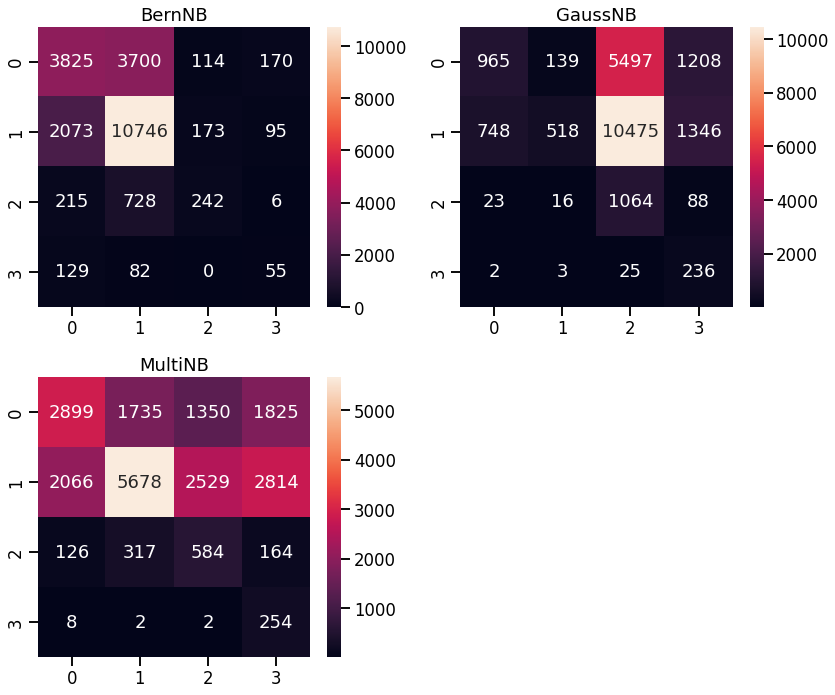

In [ ]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

### Logistic Regression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_scaled,y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
print("Logistic Regression: \n",confusion_matrix(y_pred_lr,y_test))

Logistic Regression: 
 [[ 3787  1572   155   162]
 [ 3843 11331   733    85]
 [  146   171   302     2]
 [   33    13     1    17]]


In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# The error on the training and test data sets
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.700826,0.690601
precision,0.692228,0.676986
recall,0.700826,0.690601
f1,0.682757,0.671474


<a id="preprocessingpredict"></a> <br>
# **9) Preprocessing for Delay Prediction Model:**

In [ ]:
# filtering the data
df = data.loc[data['CANCELLED'] == 0.0]
df = df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DEP_DELAY_MINUTES']]

In [ ]:
# handling attributes
labelencoder = LabelEncoder()
df['REPORTING_AIRLINE'] = labelencoder.fit_transform(df['REPORTING_AIRLINE'])
df['ORIGIN_AIRPORT_ID'] = labelencoder.fit_transform(df['ORIGIN_AIRPORT_ID'])
df['DEST_AIRPORT_ID'] = labelencoder.fit_transform(df['DEST_AIRPORT_ID'])

df['CRS_DEP_TIME'] = (df['CRS_DEP_TIME']/100).astype(int)
df['CRS_ARR_TIME'] = (df['CRS_ARR_TIME']/100).astype(int)
df.rename(columns = {'CRS_DEP_TIME':'DEP_TIME', 'CRS_ARR_TIME':'ARR_TIME'}, inplace = True)

df['DEP_DELAY_MINUTES'] = df['DEP_DELAY_MINUTES'].astype(int)

In [ ]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,REPORTING_AIRLINE,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_TIME,ARR_TIME,DEP_DELAY_MINUTES
0,14,5,16,73,91,12,13,0
1,15,6,16,73,91,12,13,0
2,16,7,16,73,91,12,13,0
3,17,1,16,73,91,12,13,0
4,18,2,16,73,91,12,13,0
...,...,...,...,...,...,...,...,...
2122751,28,4,2,326,310,8,11,0
2122752,28,4,2,310,312,19,21,158
2122753,28,4,2,262,310,7,9,0
2122754,28,4,2,236,310,14,16,0


In [ ]:
# converting to array
x = df[['DAY_OF_MONTH', 'DAY_OF_WEEK', 'REPORTING_AIRLINE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_TIME', 'ARR_TIME']].values
y = df[['DEP_DELAY_MINUTES']].values

In [ ]:
#Split into Test and Train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1536184, 7) (512062, 7) (1536184, 1) (512062, 1)


In [ ]:
# normalizing the data
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

<a id="predict"></a> <br>
# **10) Delay Prediction Model:**

## Multiple Linear Regression

In [ ]:
#This is the prediction model for prediction how long the delay with be looking at given attributes
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
! gdown --id 12dIPIjjfG12MLYoxQ5xPHod_FBEzMTiZ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12dIPIjjfG12MLYoxQ5xPHod_FBEzMTiZ
To: /content/final_airline_data.csv
100% 705M/705M [00:07<00:00, 93.7MB/s]


In [ ]:
df = pd.read_csv('final_airline_data.csv')
#imported dataset
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
#This filters out cancellations as we are only focusing on delays
df1 = df.loc[df['CANCELLED'] == 0.0]
df1 = df1.loc[df1['DEP_DELAY_MINUTES'] > 0.0]
#DEP_DELAY_MINUTES is being used instead of DEP_DELAY because it filters out negative values
#Since nominal values are more difficult to create a regression model with, we are using a few attributes
df2 = df1[['DAY_OF_WEEK','REPORTING_AIRLINE', 'DEP_DELAY_MINUTES']]
df2.head()


,DAY_OF_WEEK,REPORTING_AIRLINE,DEP_DELAY_MINUTES
21,5,YX,12.0
24,1,YX,18.0
29,6,YX,67.0
31,1,YX,73.0
45,1,YX,292.0


In [ ]:
#Seperates Reporting Airlines into boolean dummy attributes 
df_dummy1 = pd.get_dummies(df2["DAY_OF_WEEK"])
df_dummy2 = pd.get_dummies(df2["REPORTING_AIRLINE"])
#combines all dummies
df3 = pd.concat([df_dummy1, df_dummy2, df2], axis = 1)
#dropping original attributes so that they are all dummy except for dependent variable
df4 = df3
df4.drop(["DAY_OF_WEEK", "REPORTING_AIRLINE"], axis = 1, inplace = True, errors='ignore')
df4.head()

,1,2,3,4,5,6,7,9E,AA,AS,B6,DL,F9,G4,HA,MQ,NK,OH,OO,QX,UA,WN,YV,YX,DEP_DELAY_MINUTES
21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12.0
24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18.0
29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,67.0
31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,73.0
45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,292.0


[42.15234375 36.11328125 38.75       ... 38.75       26.23828125
 34.95703125]


,Actual Value,Predicted value,Difference
0,5.0,42.152344,-37.152344
1,4.0,36.113281,-32.113281
2,65.0,38.750000,26.250000
3,11.0,31.753906,-20.753906
4,23.0,46.503906,-23.503906
5,1.0,29.105469,-28.105469
6,2.0,36.113281,-34.113281
7,9.0,37.980469,-28.980469
8,36.0,28.144531,7.855469
9,17.0,46.960938,-29.960938


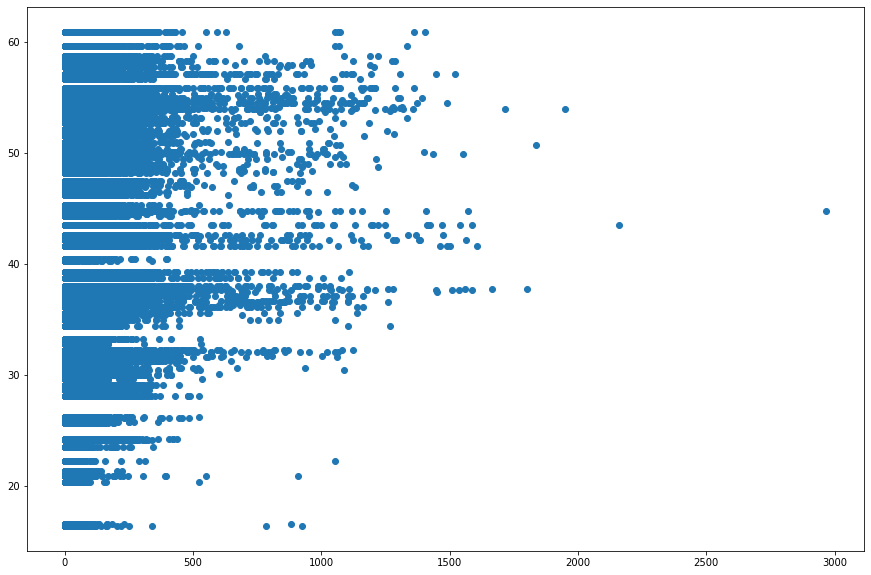

In [ ]:
#Define X and Y
x = df4.drop(['DEP_DELAY_MINUTES'],axis=1).values
y = df4['DEP_DELAY_MINUTES'].values
#Split into Test and Train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)
#Train the model on training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
#predicted values
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]

## Neural Network

In [ ]:
# building the model
model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [ ]:
# setting up the loss and optimizer
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=0.01), metrics=[msle])

In [ ]:
# training the model
history = model.fit(x_train, y_train, epochs=500, batch_size=1024, validation_split=0.2)

Epoch 1/500
1201/1201 [==============================] - 6s 4ms/step - loss: 2.4362 - mean_squared_logarithmic_error: 2.4361 - val_loss: 2.3909 - val_mean_squared_logarithmic_error: 2.3912
Epoch 2/500
1201/1201 [==============================] - 5s 4ms/step - loss: 2.3908 - mean_squared_logarithmic_error: 2.3908 - val_loss: 2.3607 - val_mean_squared_logarithmic_error: 2.3608
Epoch 3/500
1201/1201 [==============================] - 5s 4ms/step - loss: 2.3755 - mean_squared_logarithmic_error: 2.3753 - val_loss: 2.3475 - val_mean_squared_logarithmic_error: 2.3477
Epoch 4/500
1201/1201 [==============================] - 6s 5ms/step - loss: 2.3681 - mean_squared_logarithmic_error: 2.3680 - val_loss: 2.3387 - val_mean_squared_logarithmic_error: 2.3387
Epoch 5/500
1201/1201 [==============================] - 5s 4ms/step - loss: 2.3624 - mean_squared_logarithmic_error: 2.3624 - val_loss: 2.3384 - val_mean_squared_logarithmic_error: 2.3383
Epoch 6/500
1201/1201 [==============================] 

In [ ]:
# predicting the delays for test data
y_pred = model.predict(x_test)
y_pred = y_pred.astype(int)

In [ ]:
# Model comparison
output_df = pd.DataFrame(y_pred)
output_df.columns =['Predicted Delays']
output_df['Actual Delays'] = y_test
output_df['Difference'] = abs(y_test - y_pred)

In [ ]:
output_df[:10]

,Predicted Delays,Actual Delays,Difference
0,2,0,2
1,2,2,0
2,0,0,0
3,0,0,0
4,1,0,1
5,0,0,0
6,-4277,0,4277
7,2,2,0
8,0,0,0
9,2,0,2
